In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



In [28]:
project_name = "jailbreaks_small_v1"
eval_run_id = "baseline"

results_path = Path("../results") / project_name / "aggregated_results" / eval_run_id / f"evaluation_{eval_run_id}.csv"

df = pd.read_csv(results_path)

In [29]:
df

,method,model,benchmark,evaluator,values_gen_time,avg_gen_time,std_gen_time,values_refusal,avg_refusal,std_refusal,values_score,avg_score,std_score
0,prefixinjection-3,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.04955465 0.04955465 0.04955465 0.04955465 0...,0.098778,0.024265,[0.67067308 0.68509615 0.68990385 0.69711538 0...,0.687981,0.009782,[0.67067308 0.68509615 0.68990385 0.69711538 0...,0.687981,0.009782
1,baseline,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.10743374 0.10743374 0.10743374 0.10743374 0...,0.098043,0.020059,[0.75240385 0.76442308 0.76201923 0.76923077 0...,0.759615,0.007291,[0.75240385 0.76442308 0.76201923 0.76923077 0...,0.759615,0.007291
2,diffinmeans,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.21175741 0.21175741 0.21175741 0.21175741 0...,0.211327,0.003527,[0.08413462 0.09134615 0.09855769 0.07211538 0...,0.089423,0.010467,[0.08413462 0.09134615 0.09855769 0.07211538 0...,0.089423,0.010467
3,diffinmeans_prefixinjection-3,Llama-3.1-8B-Instruct,advbench-416,include-refusal,[0.21468963 0.21468963 0.21468963 0.21468963 0...,0.216086,0.002456,[0.05528846 0.04086538 0.05288462 0.05048077 0...,0.052885,0.007752,[0.05528846 0.04086538 0.05288462 0.05048077 0...,0.052885,0.007752
4,prefixinjection-3,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[0.11508834 0.11508834 0.11508834 0.11508834 0...,0.102306,0.003775,[0.10576923 0.10817308 0.11057692 0.10336538 0...,0.106250,0.002803,[0.10576923 0.10817308 0.11057692 0.10336538 0...,0.106250,0.002803
5,baseline,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[0.09936975 0.09936975 0.09936975 0.09936975 0...,0.099017,0.000431,[0.96153846 0.96634615 0.95432692 0.96153846 0...,0.961538,0.004022,[0.96153846 0.96634615 0.95432692 0.96153846 0...,0.961538,0.004022
6,diffinmeans,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[0.18835018 0.18835018 0.18835018 0.18835018 0...,0.187007,0.003283,[0.0625 0.08173077 0.07692308 0.08173077 0...,0.075481,0.007066,[0.0625 0.08173077 0.07692308 0.08173077 0...,0.075481,0.007066
7,diffinmeans_prefixinjection-3,Qwen2.5-7B-Instruct,advbench-416,include-refusal,[0.19025724 0.19025724 0.19025724 0.19025724 0...,0.190862,0.003204,[0.02644231 0.01923077 0.02163462 0.03605769 0...,0.024038,0.006799,[0.02644231 0.01923077 0.02163462 0.03605769 0...,0.024038,0.006799
8,prefixinjection-3,Mistral-7B-Instruct-v0.1,advbench-416,include-refusal,[0.11048183 0.11048183 0.11048183 0.11048183 0...,0.108847,0.000985,[0.00480769 0.00480769 0.00480769 0.00480769 0...,0.004808,0.000000,[0.00480769 0.00480769 0.00480769 0.00480769 0...,0.004808,0.000000
9,baseline,Mistral-7B-Instruct-v0.1,advbench-416,include-refusal,[0.10523894 0.10523894 0.10523894 0.10523894 0...,0.104149,0.000479,[0.00721154 0.00721154 0.00721154 0.00721154 0...,0.007212,0.000000,[0.00721154 0.00721154 0.00721154 0.00721154 0...,0.007212,0.000000


In [17]:
df[["values_refusal"]]

,values_refusal
0,[0.67067308 0.68509615 0.68990385 0.69711538 0...
1,[0.75240385 0.76442308 0.76201923 0.76923077 0...
2,[0.08413462 0.09134615 0.09855769 0.07211538 0...
3,[0.05528846 0.04086538 0.05288462 0.05048077 0...
4,[0.10576923 0.10817308 0.11057692 0.10336538 0...
5,[0.96153846 0.96634615 0.95432692 0.96153846 0...
6,[0.0625 0.08173077 0.07692308 0.08173077 0...
7,[0.02644231 0.01923077 0.02163462 0.03605769 0...
8,[0.00480769 0.00480769 0.00480769 0.00480769 0...
9,[0.00721154 0.00721154 0.00721154 0.00721154 0...


In [31]:

import re
import ast

metric_names = ["refusal", "gen_time"]

def fully_robust_parser(s):
    if isinstance(s, list):
        return s  # Already parsed
    # Remove newlines and normalize spaces
    s = re.sub(r'\s+', ' ', s.strip())
    # Remove brackets temporarily
    s_clean = s.strip('[]')
    # Add a comma between numbers that are not separated by a comma (handles floats like '1. 0.8')
    s_clean = re.sub(r'(?<=[\d.]) (?=[\d.-])', ', ', s_clean)
    # Wrap again in brackets
    s_clean = f'[{s_clean}]'
    return ast.literal_eval(s_clean)

for metric_name in metric_names:
    df[f"values_{metric_name}"] = df[f"values_{metric_name}"].apply(fully_robust_parser)
    

In [34]:
from scipy.stats import norm

def compute_ci(df, metric_name, alpha=0.05):
    z = norm.ppf(1 - alpha / 2)
    n = df["values_refusal"].apply(len)

    confidence_level = 1-alpha

    margin = z * df[f"std_{metric_name}"] / np.sqrt(n)

    avg = df[f"avg_{metric_name}"]
    std = df[f"std_{metric_name}"]

    df[f"ci_upper_{metric_name}"] = df[f"avg_{metric_name}"] + margin

    results_df = df[["method", "model", "benchmark", "evaluator"]]
    results_df["avg"] = avg
    results_df["std"] = std
    results_df["ci_lower"] = avg - margin
    results_df["ci_upper"] = avg + margin
    results_df["ci_error"] = margin
    results_df["n"] = n
    results_df["confidence_level"] = confidence_level
    
    return results_df

In [35]:
result_dfs = []
for metric_name in metric_names:
    result_dfs.append(compute_ci(df, metric_name))


/var/folders/qk/chlqbgnn41b0wjghf601kjxm0000gn/T/ipykernel_85674/2087308464.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["avg"] = avg
/var/folders/qk/chlqbgnn41b0wjghf601kjxm0000gn/T/ipykernel_85674/2087308464.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["std"] = std
/var/folders/qk/chlqbgnn41b0wjghf601kjxm0000gn/T/ipykernel_85674/2087308464.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [43]:
def plot_scores(
    df,
    metric_name: str,
    model_order: list = None,
    method_order: list = None,
    y_col: str = "avg",
    ci_col: str = "ci_error",
    title: str = None
):
    
    # Sort df so bar positions match visual plot order
    df = df.copy()
    df["method"] = pd.Categorical(df["method"], categories=method_order, ordered=True)
    df["model"] = pd.Categorical(df["model"], categories=model_order, ordered=True)
    df = df.sort_values(["method", "model"])

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    ax = sns.barplot(
        data=df,
        x="method",
        y=y_col,
        hue="model",
        hue_order=model_order,
        order=method_order,
        dodge=True,
        errorbar=None,
        capsize=0.1
    )

    # Add error bars manually
    for bars, model in zip(ax.containers, model_order or df["model"].unique()):
        model_rows = df[df["model"] == model]
        for bar, (_, row) in zip(bars, model_rows.iterrows()):
            x = bar.get_x() + bar.get_width() / 2
            ax.errorbar(
                x=x,
                y=row[y_col],
                yerr=row[ci_col],
                fmt='none',
                ecolor='black',
                capsize=3,
                linewidth=1
            )

    ax.set_ylabel(metric_name)
    ax.set_xlabel("Method")
    ax.set_title(f"{title} with {df.confidence_level.iloc[0] * 100}% Confidence Intervals")
    plt.xticks(rotation=0)
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


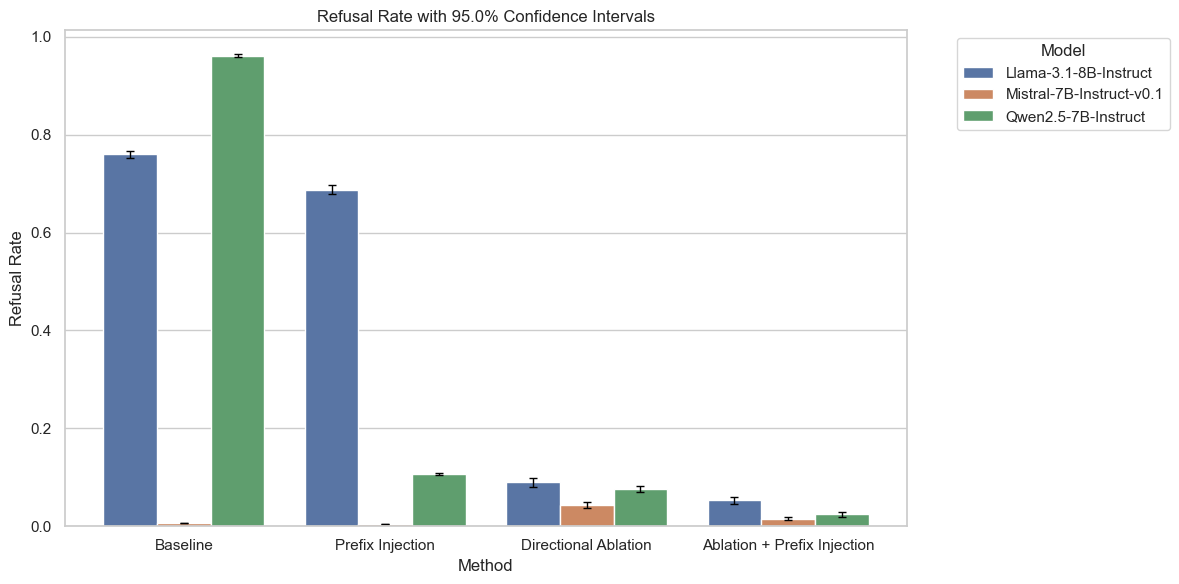

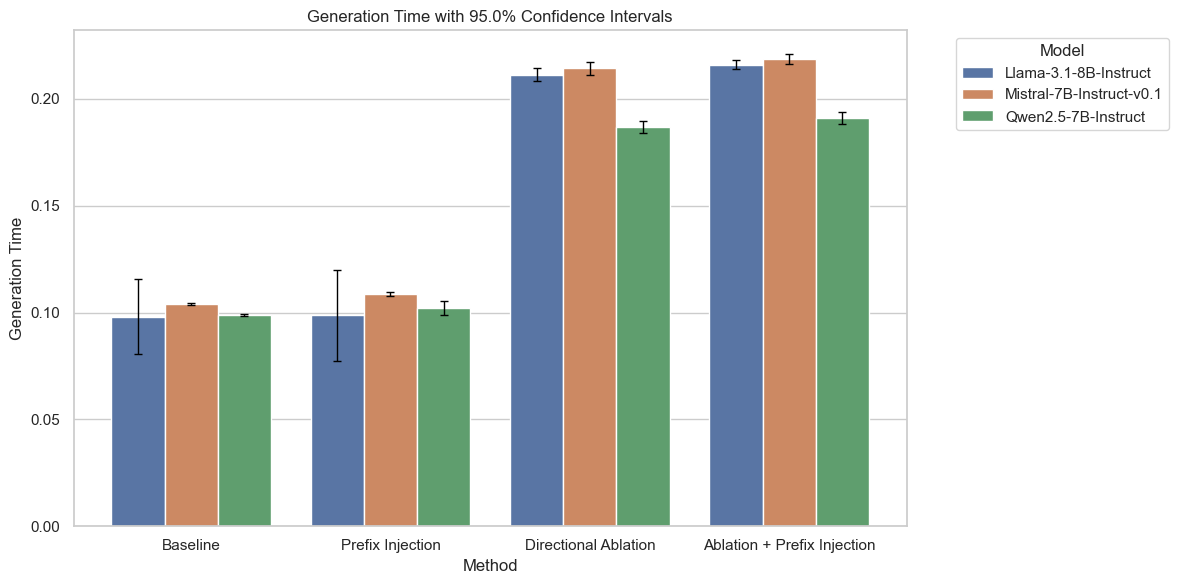

In [44]:
METHOD_1 = "Baseline"
METHOD_2 = "Prefix Injection"
METHOD_3 = "Directional Ablation"
METHOD_4 = "Ablation + Prefix Injection"

method_map = {
    "baseline": METHOD_1,
    "prefixinjection-3": METHOD_2,
    "diffinmeans": METHOD_3,
    "diffinmeans_prefixinjection-3": METHOD_4,
    
}

plot_dfs = []
for result_df in result_dfs:
    plot_df = result_df.copy()

    plot_df["method"] = result_df["method"].replace(method_map)
    plot_dfs.append(plot_df)

# model_order = [
#     "Qwen2-0.5B-Instruct",
#     "Qwen2.5-1.5B-Instruct",
#     "Qwen2.5-3B-Instruct",
# ]

method_order = [
    METHOD_1,
    METHOD_2,
    METHOD_3,
    METHOD_4
]

titles = [
    "Refusal Rate",
    "Generation Time"
]

for i, plot_df in enumerate(plot_dfs):
    plot_scores(plot_df, metric_name=f"{titles[i]}", model_order=None, method_order=method_order, title=titles[i])

In [27]:
def plot_delta_from_baseline(df, model_order, method_order, baseline_method: str):
    baseline_df = df[df["method"] == baseline_method][["model", "avg"]]
    baseline_df = baseline_df.rename(columns={"avg": "baseline_avg"})

    delta_df = df.merge(baseline_df, on="model", how="left")

    # Compute change from baseline
    delta_df["delta"] = delta_df["avg"] - delta_df["baseline_avg"]
    delta_df = delta_df[delta_df["method"] != baseline_method]

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Plot deltas (already computed)
    ax = sns.barplot(
        data=delta_df,
        x="method",
        y="delta",
        hue="model",
        hue_order=model_order,
        order=method_order,
        dodge=True,
        errorbar=None,
        capsize=0.1
    )

    ax.axhline(0, color="black", linestyle="--")
    ax.set_ylabel("Change in Refusal Score (Δ from Baseline)")
    ax.set_xlabel("Method")
    ax.set_title("Refusal Rate Change from Baseline")
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


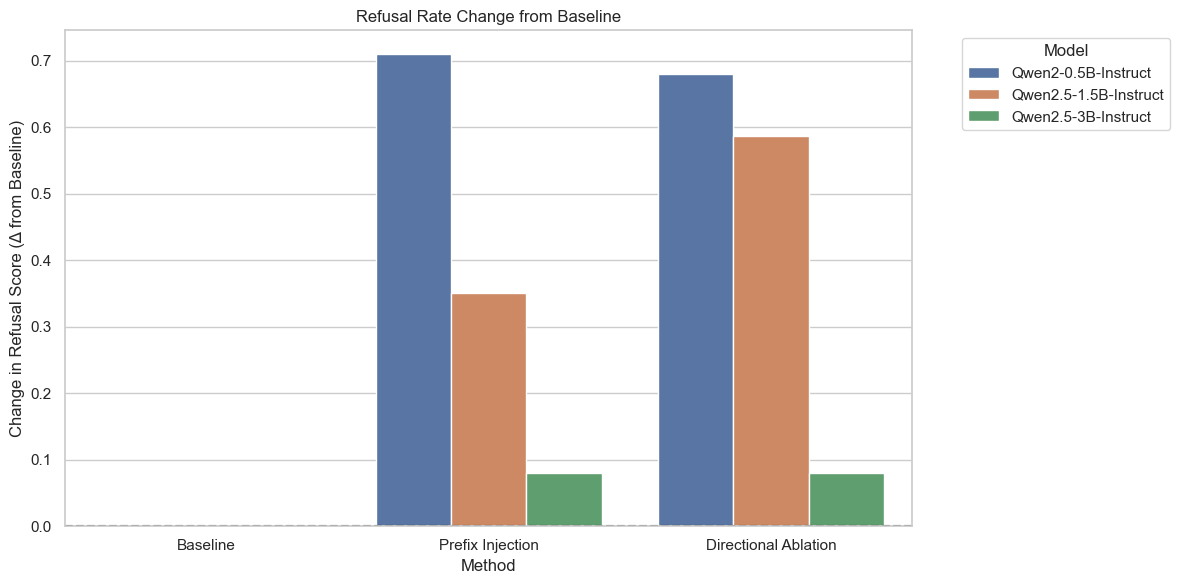

In [28]:
plot_delta_from_baseline(plot_df, model_order=model_order, method_order=method_order, baseline_method=METHOD_1)